In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities

In [6]:
input_path = 'p2p-Gnutella04.txt'
output_path = 'p2p-Gnutella04.csv'

df = pd.read_csv(input_path, sep='\t', comment='#', header=None, names=["FromNodeId", "ToNodeId"])

df.to_csv(output_path, index=False)

print("sucessfully converted.")

sucessfully converted.


In [7]:
file_path = "p2p-Gnutella04.txt"

df = pd.read_csv(file_path, sep="\t", comment='#', header=None, names=["FromNodeId", "ToNodeId"])
print("Dataset Overview:")
print("--------------------------------")
print(f"Total number of edges: {len(df)}")

unique_nodes = pd.unique(df[["FromNodeId", "ToNodeId"]].values.ravel())
print(f"Total number of nodes: {len(unique_nodes)}")

has_weights = df.shape[1] > 2
print(f"Does the dataset include edge weights?: {'Yes' if has_weights else 'No'}")




Dataset Overview:
--------------------------------
Total number of edges: 39994
Total number of nodes: 10876
Does the dataset include edge weights?: No


In [8]:
G = nx.DiGraph()
G.add_edges_from(df.values)

print("\n Graph Analysis:")
print("--------------------------------")
print(f"Is the graph directed?: {'Yes' if G.is_directed() else 'No'}")
print(f"Graph density: {nx.density(G):.6f}")
print(f"Number of weakly connected components: {nx.number_weakly_connected_components(G)}")
isolated_nodes = list(nx.isolates(G))
print(f"Number of isolated nodes: {len(isolated_nodes)}")




 Graph Analysis:
--------------------------------
Is the graph directed?: Yes
Graph density: 0.000338
Number of weakly connected components: 1
Number of isolated nodes: 0


In [9]:
# Degree analysis
print("\nDegree Analysis:")
print("--------------------------------")
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())
total_degrees = dict(G.degree())

avg_in = sum(in_degrees.values()) / len(in_degrees)
avg_out = sum(out_degrees.values()) / len(out_degrees)
avg_total = sum(total_degrees.values()) / len(total_degrees)

print(f"Average in-degree: {avg_in:.2f}")
print(f"Maximum in degree: {max(in_degrees.values())}")
print(f"Minimum in degree: {min(in_degrees.values())}")
print("---------------")
print(f"Average out-degree: {avg_out:.2f}")
print(f"Maximum out degree: {max(out_degrees.values())}")
print(f"Minimum out degree: {min(out_degrees.values())}")
print("---------------")
print(f"Average total degree: {avg_total:.2f}")
print(f"Maximum total degree: {max(total_degrees.values())}")
print(f"Minimum total degree: {min(total_degrees.values())}")

top_degrees = sorted(total_degrees.items(), key=lambda x: x[1], reverse=True)[:3]
print("\nTop 3 nodes by total degree:")
for node, deg in top_degrees:
    print(f"Node {node}: {deg} degree(s)")


Degree Analysis:
--------------------------------
Average in-degree: 3.68
Maximum in degree: 72
Minimum in degree: 0
---------------
Average out-degree: 3.68
Maximum out degree: 100
Minimum out degree: 0
---------------
Average total degree: 7.35
Maximum total degree: 103
Minimum total degree: 1

Top 3 nodes by total degree:
Node 3109: 103 degree(s)
Node 1054: 82 degree(s)
Node 9134: 66 degree(s)


In [10]:
print("\nCentrality Measures:")
print("--------------------------------")

# PageRank
pagerank = nx.pagerank(G)
avg_pagerank = sum(pagerank.values()) / len(pagerank)
top_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:3]
print(f"Average PageRank: {avg_pagerank:.5f}")
print("Top 3 nodes by PageRank:")
for node, score in top_pagerank:
    print(f"Node {node}: PageRank = {score:.5f}")

# Betweenness
betweenness = nx.betweenness_centrality(G)
avg_betweenness = sum(betweenness.values()) / len(betweenness)
top_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:3]
print(f"\nAverage Betweenness Centrality: {avg_betweenness:.5f}")
print("Top 3 nodes by Betweenness Centrality:")
for node, score in top_betweenness:
    print(f"Node {node}: Betweenness = {score:.5f}")

# Closeness
closeness = nx.closeness_centrality(G)
avg_closeness = sum(closeness.values()) / len(closeness)
top_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:3]
print(f"\nAverage Closeness Centrality: {avg_closeness:.5f}")
print("Top 3 nodes by Closeness Centrality:")
for node, score in top_closeness:
    print(f"Node {node}: Closeness = {score:.5f}")


Centrality Measures:
--------------------------------
Average PageRank: 0.00009
Top 3 nodes by PageRank:
Node 1056: PageRank = 0.00067
Node 1054: PageRank = 0.00066
Node 1536: PageRank = 0.00055

Average Betweenness Centrality: 0.00021
Top 3 nodes by Betweenness Centrality:
Node 3109: Betweenness = 0.00595
Node 410: Betweenness = 0.00591
Node 696: Betweenness = 0.00583

Average Closeness Centrality: 0.06170
Top 3 nodes by Closeness Centrality:
Node 1056: Closeness = 0.10380
Node 1054: Closeness = 0.10199
Node 453: Closeness = 0.10037


In [11]:
print("\nClustering and Transitivity:")
print("--------------------------------")
undirected_G = G.to_undirected()
avg_clustering = nx.average_clustering(undirected_G)
transitivity = nx.transitivity(undirected_G)
print(f"Average clustering coefficient: {avg_clustering:.5f}")
print(f"Transitivity: {transitivity:.5f}")
print(f"Assortativity coefficient: {nx.degree_pearson_correlation_coefficient(G):.4f}")


Clustering and Transitivity:
--------------------------------
Average clustering coefficient: 0.00622
Transitivity: 0.00540
Assortativity coefficient: -0.0083



Visualization (sample of 1000 nodes):
--------------------------------


C:\Users\mmy\AppData\Local\Temp\ipykernel_13032\4017758667.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


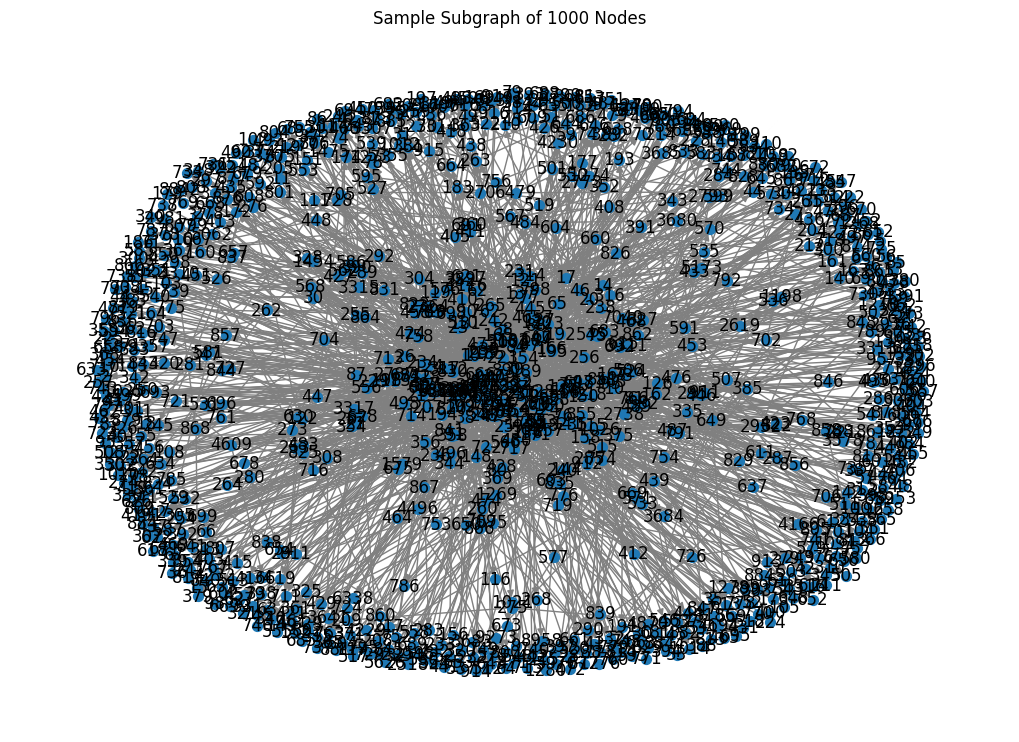

In [12]:

print("\nVisualization (sample of 1000 nodes):")
print("--------------------------------")
sample_nodes = list(G.nodes())[:1000]
subgraph = G.subgraph(sample_nodes)
plt.figure(figsize=(10, 7))
nx.draw(subgraph, with_labels=True, node_size=50, arrows=True, edge_color='gray')
plt.title("Sample Subgraph of 1000 Nodes")
plt.tight_layout()
plt.show()

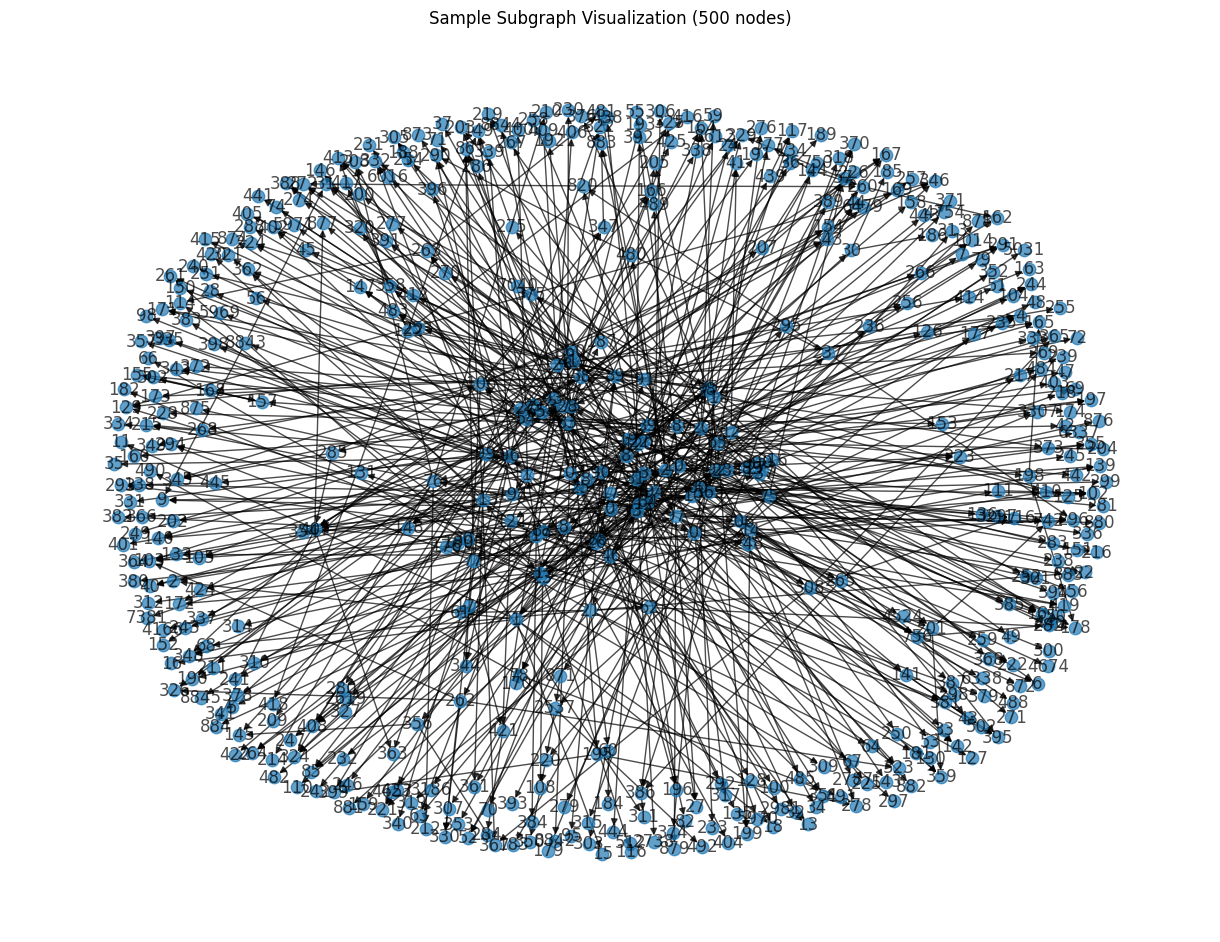

In [13]:
sample_nodes = list(G.nodes())[:500]  
sample_subgraph = G.subgraph(sample_nodes)

plt.figure(figsize=(12, 9))
nx.draw(sample_subgraph, with_labels=True, node_size=80, arrows=True, alpha=0.7)
plt.title("Sample Subgraph Visualization (500 nodes)")
plt.show()

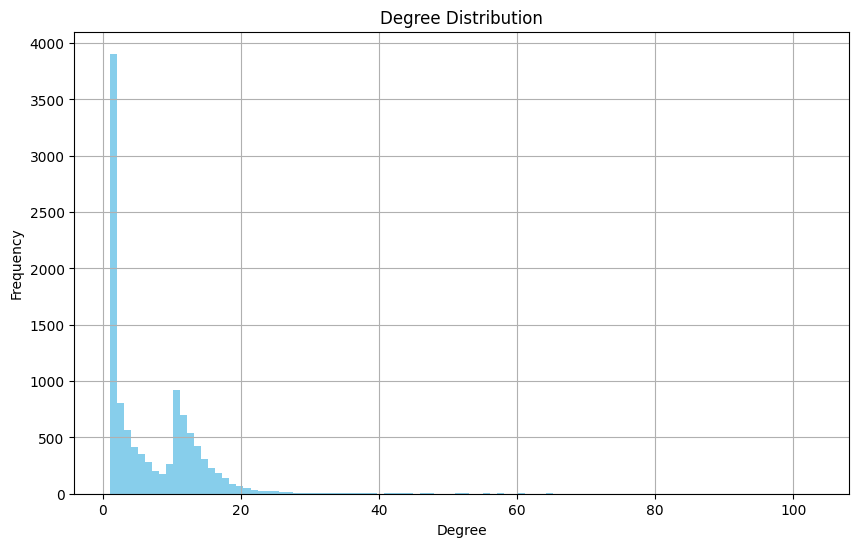

In [14]:
degrees = [deg for _, deg in G.degree()]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=100, color='skyblue')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

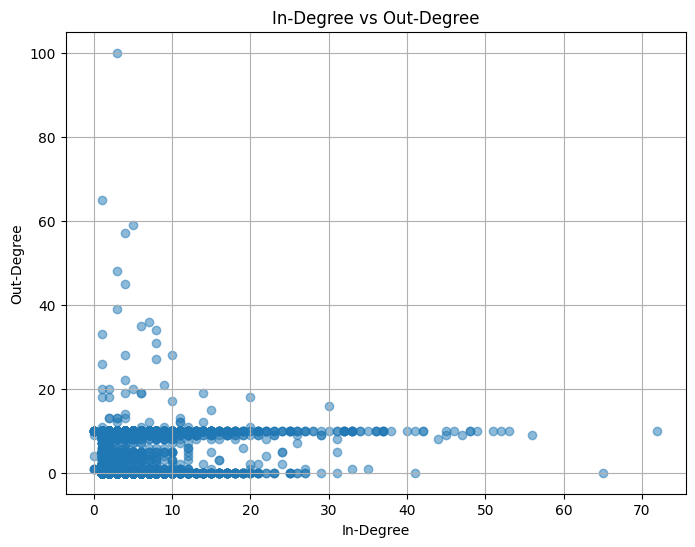

In [15]:
in_deg = dict(G.in_degree())
out_deg = dict(G.out_degree())

plt.figure(figsize=(8, 6))
plt.scatter(list(in_deg.values()), list(out_deg.values()), alpha=0.5)
plt.xlabel("In-Degree")
plt.ylabel("Out-Degree")
plt.title("In-Degree vs Out-Degree")
plt.grid(True)
plt.show()

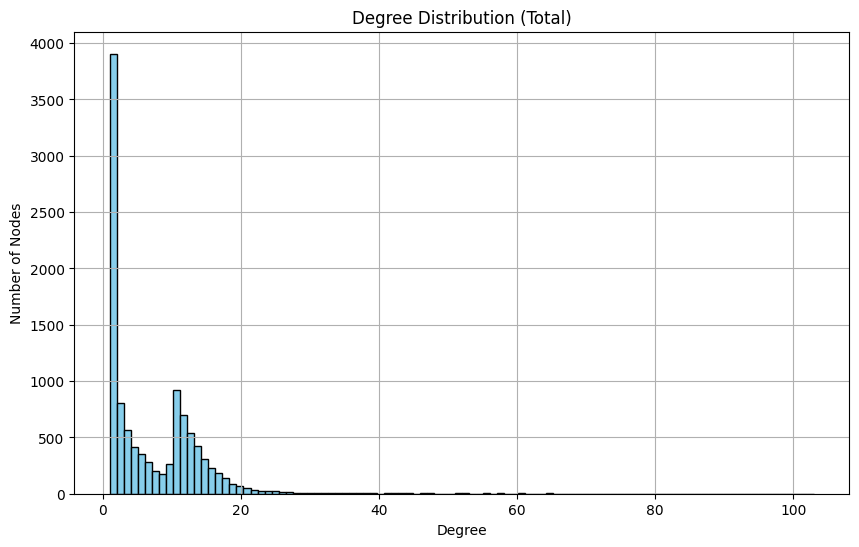

In [16]:
# Total degree distribution
degrees = [deg for _, deg in G.degree()]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=100, color='skyblue', edgecolor='black')
plt.title("Degree Distribution (Total)")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.grid(True)
plt.show()

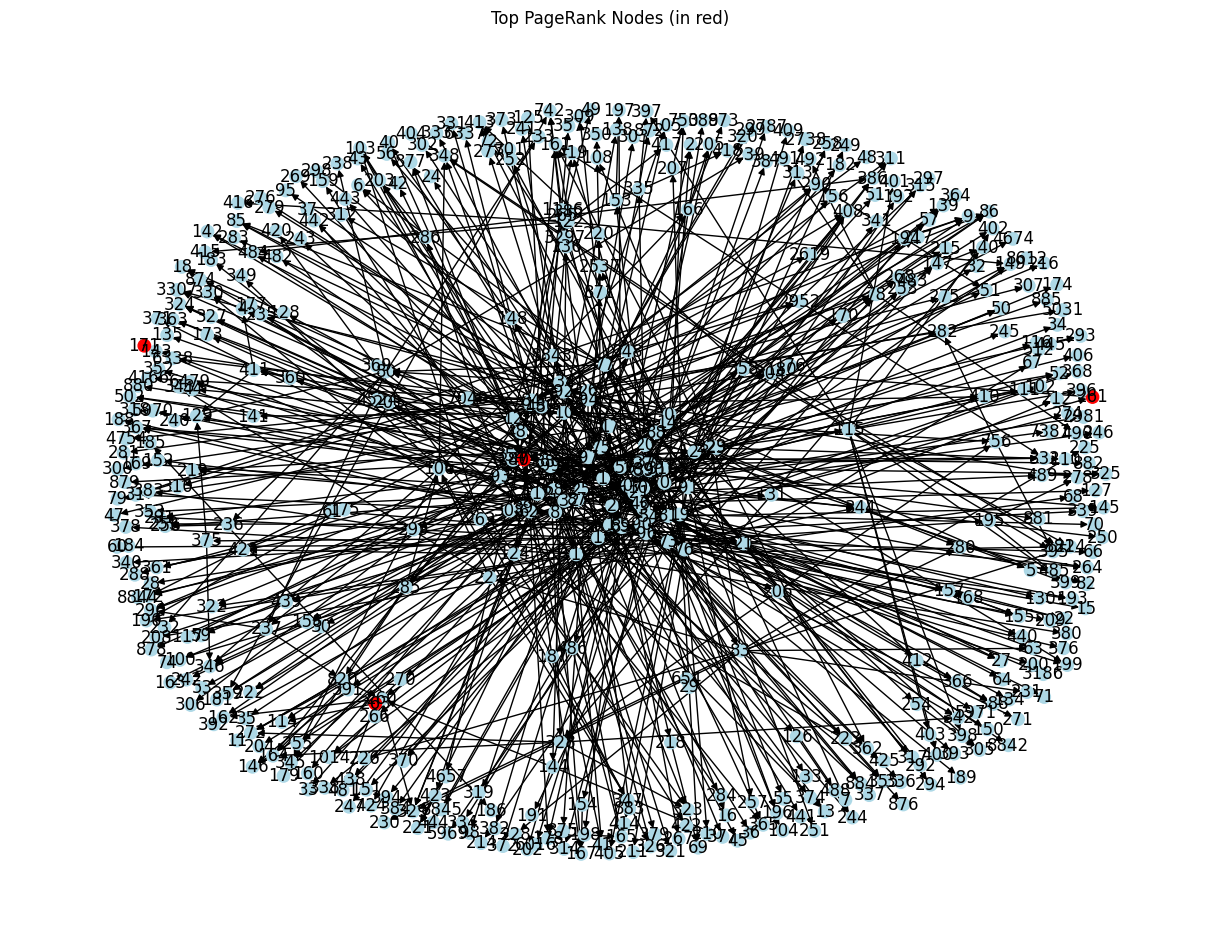

In [17]:
pagerank_scores = nx.pagerank(G)
top_nodes = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:10] #top nodes

top_node_ids = [n for n, _ in top_nodes]
colors = ['red' if n in top_node_ids else 'lightblue' for n in sample_subgraph.nodes()]

plt.figure(figsize=(12, 9))
nx.draw(sample_subgraph, with_labels=True, node_color=colors, node_size=80, arrows=True)
plt.title("Top PageRank Nodes (in red)")
plt.show()

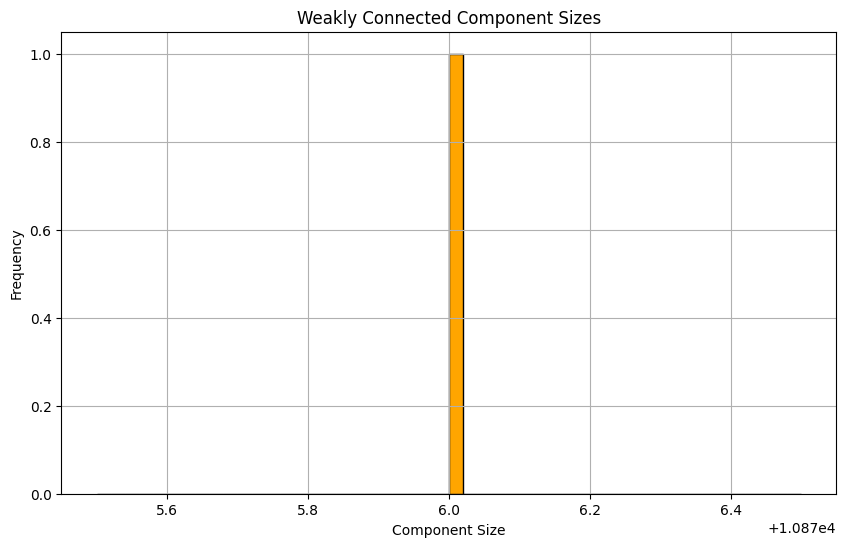

In [18]:
components = nx.weakly_connected_components(G)
component_sizes = [len(c) for c in components]

plt.figure(figsize=(10, 6))
plt.hist(component_sizes, bins=50, color='orange', edgecolor='black')
plt.title("Weakly Connected Component Sizes")
plt.xlabel("Component Size")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


Number of communities found: 20
Size of the largest community: 2144


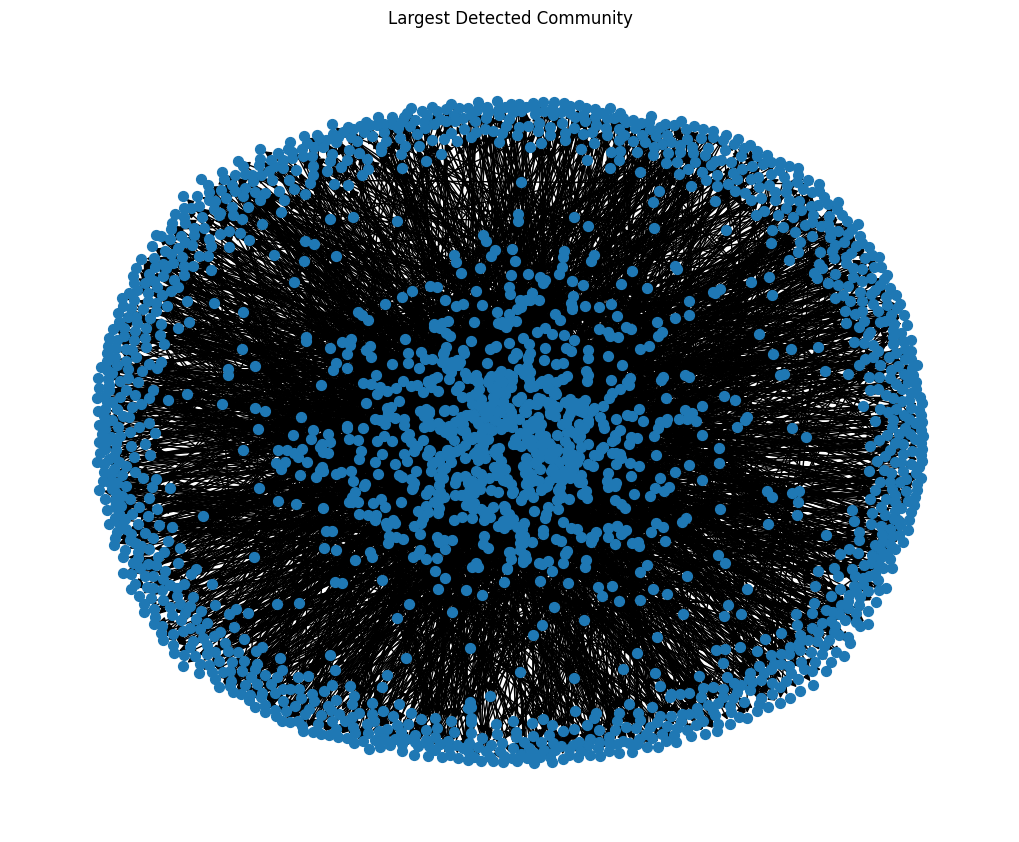

In [19]:
from networkx.algorithms.community import greedy_modularity_communities

undirected = G.to_undirected()  # community detection works on undirected graphs
communities = list(greedy_modularity_communities(undirected))
print(f"Number of communities found: {len(communities)}")

largest = max(communities, key=len)
print(f"Size of the largest community: {len(max(communities, key=len))}")
subG = G.subgraph(largest)

plt.figure(figsize=(10, 8))
nx.draw(subG, node_size=50, with_labels=False, arrows=True)
plt.title("Largest Detected Community")
plt.show()


Number of communities found: 20
Size of the largest community: 2144


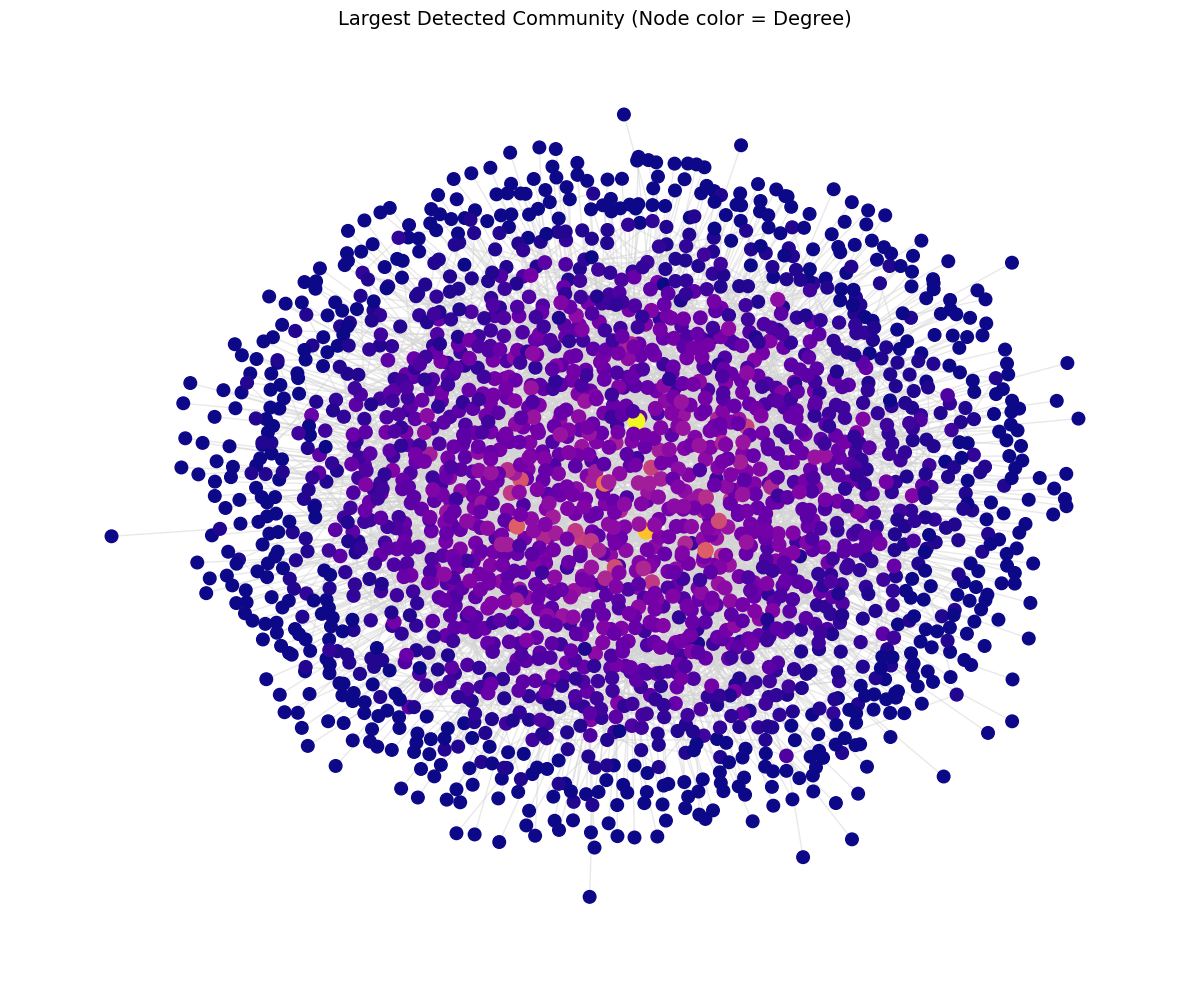

In [21]:
from networkx.algorithms.community import greedy_modularity_communities

# Toplulukları tespit et
undirected = G.to_undirected()
communities = list(greedy_modularity_communities(undirected))
print(f"Number of communities found: {len(communities)}")

# En büyük topluluğu seç
largest = max(communities, key=len)
print(f"Size of the largest community: {len(largest)}")
subG = undirected.subgraph(largest)


# Düğüm derecelerine göre renk ve boyutlandırma (isteğe bağlı daha etkileyici olur)
node_degrees = dict(subG.degree())
node_colors = [node_degrees[n] for n in subG.nodes()]
node_sizes = [80 + 2 * node_degrees[n] for n in subG.nodes()]  # daha yüksek derece = daha büyük

# Layout seçimi
pos = nx.kamada_kawai_layout(subG)

# Görselleştirme
plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(subG, pos, node_color=node_colors, cmap=plt.cm.plasma, node_size=node_sizes)
nx.draw_networkx_edges(subG, pos, edge_color='lightgray', alpha=0.5)
plt.title("Largest Detected Community (Node color = Degree)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()
